# geometry
## for manipulating geometries

In [1]:
from evaltools.geometry import *
import matplotlib.pyplot as plt
import geopandas as gpd

### dual graph
This generates a graph dual to the provided geometric data (`GeoDataFrame`)

In [3]:
%%time
vtd_shp = gpd.read_file("data/NC_vtd20/") # North Carolina VTDs
graph = dualgraph(vtd_shp,
                  index=None, # could pass `GEOID20` to label the nodes by `GEOID20`, otherwise 0-indexed
                  colmap={}, # maps old column names to new ones
                  buffer=0, # geometric buffer distance (default to 0)
                  edges_to_add=[], # edges to add to the graph
                  edges_to_cut=[], # edges to remove from the graph
                 )

/Users/gabe/.local/share/virtualenvs/mggg-j24Bs5_X/lib/python3.9/site-packages/gerrychain-0.2.18-py3.9.egg/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i


CPU times: user 26.1 s, sys: 363 ms, total: 26.5 s
Wall time: 26.5 s


### dissolve
This dissolves the geometric data on the column `by`. We generally use this to dissolve a set of source geometries (e.g. VTDs, blocks, etc.) to district geometries. In this case, we'll dissolve our North Carolina VTDs by county, since we don't have a district assignment column.

In [4]:
%%time
counties = dissolve(vtd_shp,
                    by="COUNTYFP20",
                    reset_index=True, # defaults to making the result integer-indexed, not the `by` column
                    keep=["TOTPOP20"], # Additional columns to keep beyond the geometry and `by` columns. Defaults to []
                    aggfunc="sum", # pandas groupby function type when aggregating; defaults to "sum"
                   )

CPU times: user 5.86 s, sys: 52.5 ms, total: 5.91 s
Wall time: 5.92 s


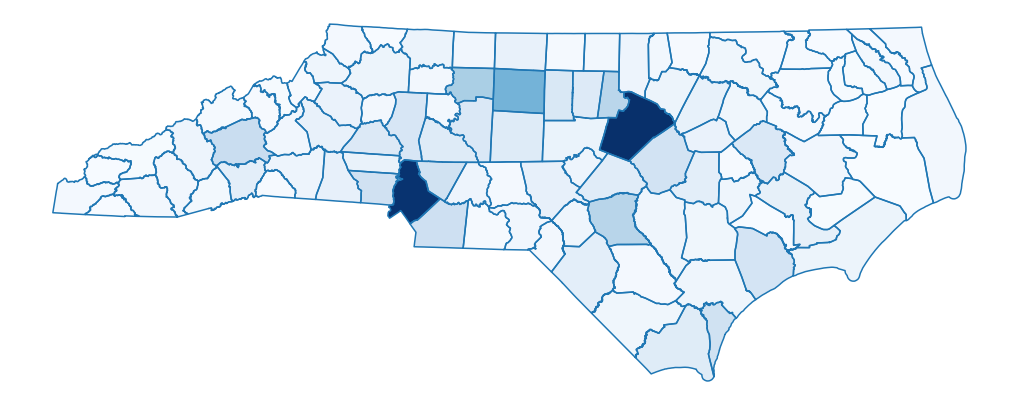

In [5]:
# show that we can now plot the county-level populations
fig, ax = plt.subplots(figsize=(18,8))
ax = counties.plot(ax=ax,
                   column="TOTPOP20",
                   cmap='Blues',
                  )
ax = counties.boundary.plot(ax=ax)
_ = plt.axis('off')

### unitmap and invert
`unitmap` creates a mapping from source (smaller) units to target (larger) units. `invert` inverts the provided unitmapping, mapping the target (larger) units to lists of source (smaller) units. Often we would want to do this for blocks &rarr; VTDs, but here we'll test this on VTDs &rarr; counties.

In [11]:
%%time
mapping = unitmap((vtd_shp, "GEOID20"), (counties, "COUNTYFP20"))
inverted_mapping = invert(mapping)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.32it/s]

CPU times: user 3.32 s, sys: 57.5 ms, total: 3.38 s
Wall time: 3.39 s


### TODO:
`dispersion_updater_closure`, `minimize_parity`, `minimize_dispersion_with_parity`